In [102]:
# manipulacja danymi
import numpy as np
import pandas as pd

# wizualizacja danych
import matplotlib.pyplot as plt
import seaborn as sns

# statystyczna analiza danych
from scipy import stats

# przygotowanie danych
from sklearn.preprocessing import StandardScaler, MinMaxScaler
dataset = pd.read_csv('titanic.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [103]:
age_values = dataset.loc[dataset['Age'].notnull(), 'Age'].values
age_values.shape

(714,)

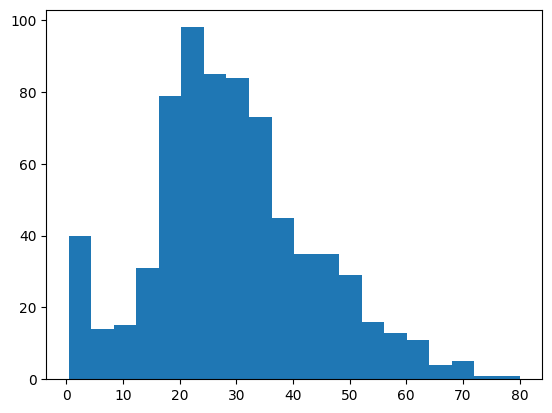

In [104]:
plt.hist(age_values, bins=20)
plt.show()

In [105]:
mean_age = np.round(np.mean(age_values))
mean_age

np.float64(30.0)

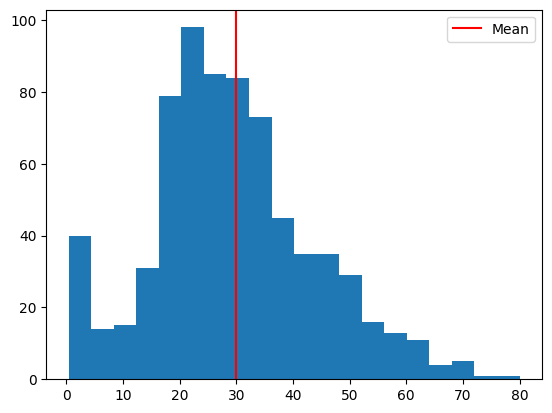

In [106]:
plt.hist(age_values,bins=20)
plt.axvline(x=mean_age,color='red',label='Mean')
plt.legend(loc='upper right')
plt.show()

In [107]:
median_age = np.median(age_values)
median_age

np.float64(28.0)

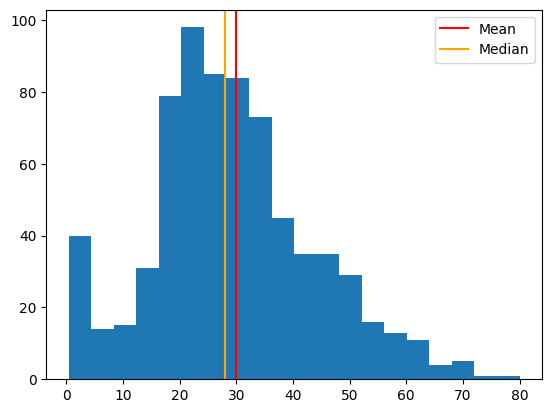

In [108]:
plt.hist(age_values,bins=20)
plt.axvline(x=mean_age,color='red',label='Mean')
plt.axvline(x=median_age,color='orange',label='Median')
plt.legend(loc='upper right')
plt.show()

In [109]:
mode_age = stats.mode(age_values)
mode_age

ModeResult(mode=np.float64(24.0), count=np.int64(30))

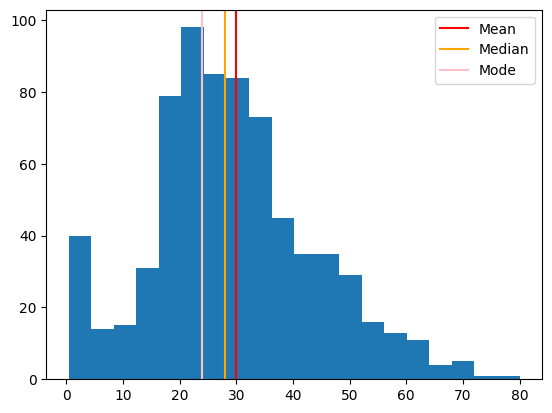

In [110]:
plt.hist(age_values,bins=20)
plt.axvline(x=mean_age,color='red',label='Mean')
plt.axvline(x=median_age,color='orange',label='Median')
plt.axvline(x=mode_age[0],color='pink',label='Mode') # The mode result is in tuple at index 0: ModeResult(mode=np.float64(24.0), count=np.int64(30))
plt.legend(loc='upper right')
plt.show()

In [111]:
q0 = np.quantile(age_values, 0.0)
q1 = np.round(np.quantile(age_values, 0.25))
q2 = np.round(np.quantile(age_values, 0.5))
q3 = np.round(np.quantile(age_values, 0.75))
q4 = np.round(np.quantile(age_values, 1))
print(f"Q0: {q0}")
print(f"Q1: {q1}")
print(f"Q2: {median_age}")
print(f"Q2: {q2}")
print(f"Q3: {q3}")
print(f"Q4: {q4}")


Q0: 0.42
Q1: 20.0
Q2: 28.0
Q2: 28.0
Q3: 38.0
Q4: 80.0


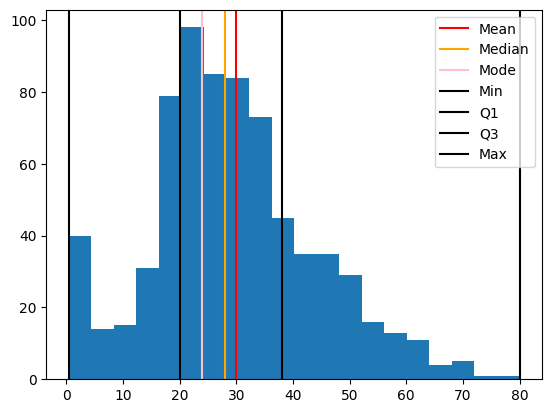

In [112]:
plt.hist(age_values,bins=20)
plt.axvline(x=mean_age,color='red',label='Mean')
plt.axvline(x=median_age,color='orange',label='Median')
plt.axvline(x=mode_age[0],color='pink',label='Mode') 
plt.axvline(x=q0,color='black',label='Min')
plt.axvline(x=q1,color='black',label='Q1')
plt.axvline(x=q3,color='black',label='Q3')
plt.axvline(x=q4,color='black',label='Max')
plt.legend(loc='upper right')
plt.show()

In [113]:
range_age = max(age_values) - min(age_values)
range_age

np.float64(79.58)

In [114]:
# Inter Quartile Range
iqr = q3-q1
iqr

np.float64(18.0)

### BoxPlot -> Q1 - 1.5 x IQR  |  IQR  | Q3 + 1.5 x IQR
If min or max value is less than 1.5x then, the whisker of boxplot is shorter. Values outside 1.5x are outliers

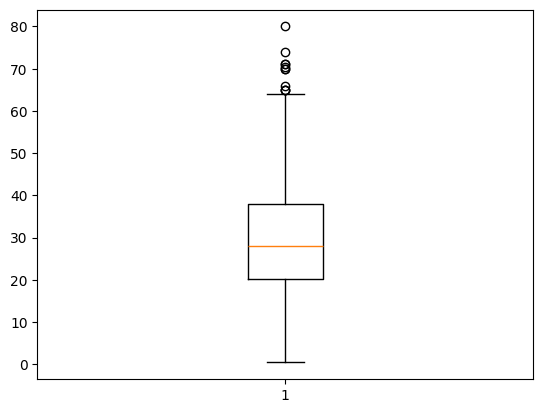

In [115]:
plt.boxplot(age_values)
plt.show()

In [116]:
variance_age = np.var(age_values, ddof=1) # Delta Degrees of Freedom
variance_age

np.float64(211.01912474630805)

In [117]:
variance_age**(1/2)

np.float64(14.526497332334042)

In [118]:
standard_deviation_age = np.std(age_values, ddof=1)
standard_deviation_age

np.float64(14.526497332334042)

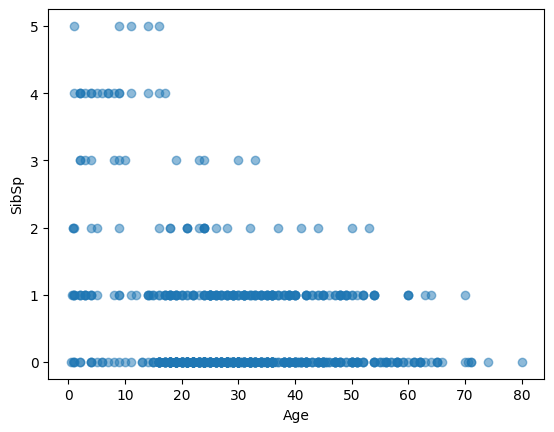

In [119]:
sibsp_values = dataset.loc[dataset['Age'].notnull(),'SibSp'].values
plt.scatter(x=age_values,y=sibsp_values, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('SibSp')
plt.show()

In [120]:
stats.pearsonr(age_values,sibsp_values)

PearsonRResult(statistic=np.float64(-0.30824675892365666), pvalue=np.float64(3.509025193784474e-17))

In [121]:
# P-value
stats.pearsonr(age_values,sibsp_values)[1]

np.float64(3.509025193784474e-17)

# Bayes Theorem

$$ P(A|B) = \frac{P(B|A) \times P(A)}{P(B)} $$

In [122]:
def bayes_theorem(p_a, p_b_given_a, p_b):
    p_a_given_b = (p_a * p_b_given_a) / p_b
    return p_a_given_b

In [123]:
# CASE 1. Given that:

# P(A) 10% of patients have liver disease
p_a = 0.1

# P(B|A) 7% of patiens with liver disease are alcoholics
p_b_given_a = 0.07

# P(B) 5% of papients are alcoholics
p_b = 0.05

# Calc P(A|B)
result = bayes_theorem(p_a,p_b_given_a,p_b)
print(f"P(A|B) is %.2f%%" % (result * 100))

P(A|B) is 14.00%


In [124]:
# CASE 2. Given that:

# P(A) 40% customers purchased an alarm system
p_a = 0.4

# P(A ∩ B): Probability of buying both an alarm system and bucket seats.
p_a_and_b = 0.2

# P(B) 30% purchased a bucket seat
p_b = 0.3

# Calc P(B|A) Probability of buying bucket seats given that the buyer has already bought an alarm system.
p_b_given_a = p_a_and_b / p_a
print('P(B|A) = %.2f%% of buyers who purchased an alarm system also purchased bucket seats.' % (p_b_given_a * 100))

p_a_given_b = bayes_theorem(p_a,p_b_given_a,p_b)
print(f'P(A|B) = %.2f%% of buyers who purchased bucket seats also purchased an alarm system.' % (p_a_given_b * 100))

P(B|A) = 50.00% of buyers who purchased an alarm system also purchased bucket seats.
P(A|B) = 66.67% of buyers who purchased bucket seats also purchased an alarm system.


# Bernouli

Purpose:
 - Simulate n Bernoulli trials with probability p of success (1).
 - Calculate the empirical probabilities of outcomes 0 (failure) and 1 (success) based on the simulation.

In [125]:
p = 0.1  # Probability of success (1) in each trial
n = 100  # Number of Bernoulli trials to simulate

"""
.rvs: Usage: Generates random samples from a specified distribution.
Applicable Distributions: Bernoulli, Binomial, Poisson, Normal, etc.
Common Parameters:
    p, mu, loc, scale: Parameters defining the distribution.
    size: Number of samples to generate.
    random_state: Seed for reproducibility.
"""
bern_func = stats.bernoulli.rvs(p,size=n) # Random Variates. Result: An array of 0s and 1s representing failures and successes across 100 trials.
print(bern_func)

#Calculating Empirical Probabilities 
"""
A list containing two elements:
    [Empirical probability of failure (0), Empirical probability of success (1)]
Purpose: To store and easily reference both probabilities together.
"""
bern_probability = [
    bern_func[bern_func==0].shape[0] / bern_func.shape[0], # number of failures / total number of trials
    bern_func[bern_func==1].shape[0] / bern_func.shape[0] # number of successes / total number of trials
]
print(bern_probability)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0.89, 0.11]


stats.bernoulli.rvs(p, size=n):

- rvs stands for Random Variates.
    - Purpose: Generates random samples from a Bernoulli distribution.
    - Parameters:
        -   p: Probability of success (1) in each trial.
        - size: Number of trials to simulate.
        - Other Optional Parameters:
            - loc: Location parameter (default is 0). Shifts the distribution.


Certainly! Let's break down and explain each part of your code step-by-step to ensure you fully understand how it works.

---

## **1. Code Overview**

```python
p = 0.1
n = 100

bern_func = stats.bernoulli.rvs(p, size=n)
print(bern_func)
bern_probability = [
    bern_func[bern_func == 0].shape[0] / bern_func.shape[0],
    bern_func[bern_func == 1].shape[0] / bern_func.shape[0]
]
```

- **Purpose:** 
  - Simulate `n` Bernoulli trials with probability `p` of success (1).
  - Calculate the empirical probabilities of outcomes 0 (failure) and 1 (success) based on the simulation.

---

## **2. Detailed Explanation**

### **a. Importing Necessary Library**

Before running the provided code, ensure you've imported the `scipy.stats` module:

```python
from scipy import stats
```

### **b. Setting Parameters**

```python
p = 0.1  # Probability of success (1) in each trial
n = 100  # Number of Bernoulli trials to simulate
```

- **`p` (Probability of Success):** The likelihood that any single trial results in a success (1). Here, there's a 10% chance of success.
  
- **`n` (Number of Trials):** The total number of independent Bernoulli trials to simulate. Here, 100 trials are performed.

### **c. Generating Bernoulli Random Variables**

```python
bern_func = stats.bernoulli.rvs(p, size=n)
print(bern_func)
```

- **`stats.bernoulli.rvs(p, size=n)`:**
  - **`rvs`** stands for **Random Variates**.
  - **Purpose:** Generates random samples from a Bernoulli distribution.
  - **Parameters:**
    - `p`: Probability of success (1) in each trial.
    - `size`: Number of trials to simulate.
    - **Other Optional Parameters:**
      - `loc`: Location parameter (default is 0). Shifts the distribution.
      - `random_state`: Seed or `RandomState` instance for reproducibility.
  
  **Example Usage:**
  
  ```python
  bern_func = stats.bernoulli.rvs(p=0.1, size=100)
  ```
  
  **Result:** An array of 0s and 1s representing failures and successes across 100 trials. For example:
  
  ```
  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  ```

### **d. Calculating Empirical Probabilities**

```python
bern_probability = [
    bern_func[bern_func == 0].shape[0] / bern_func.shape[0],
    bern_func[bern_func == 1].shape[0] / bern_func.shape[0]
]
```

- **`bern_func[bern_func == 0]`:**
  - **Purpose:** Selects all elements in `bern_func` that are equal to 0 (failures).
  - **Explanation:** 
    - `bern_func == 0` creates a boolean array where each element is `True` if the condition is met and `False` otherwise.
    - `bern_func[bern_func == 0]` uses this boolean array to filter and return only the elements that satisfy the condition.

- **`.shape[0]`:**
  - **Purpose:** Returns the number of elements in the first dimension of the array (i.e., the total count of selected elements).
  - **Explanation:** 
    - For a 1D array, `shape[0]` gives the total number of elements.
    - Example:
      ```python
      array = np.array([0, 1, 0, 0])
      print(array.shape[0])  # Output: 4
      ```

- **Division Operation:**
  - **`bern_func[bern_func == 0].shape[0] / bern_func.shape[0]`:**
    - **Numerator:** Number of failures (0s).
    - **Denominator:** Total number of trials (`n`).
    - **Result:** Proportion of failures in the simulation.

  - **Similarly for successes (1s):**
    - **`bern_func[bern_func == 1].shape[0] / bern_func.shape[0]`:**
      - **Numerator:** Number of successes (1s).
      - **Denominator:** Total number of trials (`n`).
      - **Result:** Proportion of successes in the simulation.

- **Why a List with Two Arguments?**
  - **`bern_probability`:** 
    - A list containing two elements:
      1. **First Element:** Empirical probability of failure (0).
      2. **Second Element:** Empirical probability of success (1).
    - **Purpose:** To store and easily reference both probabilities together.

  **Example Calculation:**
  
  Suppose `bern_func` has 90 zeros and 10 ones:
  
  ```python
  bern_probability = [
      90 / 100,  # 0.9
      10 / 100   # 0.1
  ]
  print(bern_probability)  # Output: [0.9, 0.1]
  ```

---

## **3. Summary of Key Concepts**

### **a. `.rvs` Function**

- **Definition:** `rvs` stands for **Random Variates**.
- **Usage:** Generates random samples from a specified distribution.
- **Applicable Distributions:** Bernoulli, Binomial, Poisson, Normal, etc.
- **Common Parameters:**
  - `p`, `mu`, `loc`, `scale`: Parameters defining the distribution.
  - `size`: Number of samples to generate.
  - `random_state`: Seed for reproducibility.

**Example with Different Distributions:**

```python
# Bernoulli Distribution
bern_samples = stats.bernoulli.rvs(p=0.3, size=50)

# Binomial Distribution
binom_samples = stats.binom.rvs(n=10, p=0.3, size=50)

# Poisson Distribution
pois_samples = stats.poisson.rvs(mu=4, size=50)

# Normal Distribution
norm_samples = stats.norm.rvs(loc=0, scale=1, size=50)
```

### **b. `bern_probability` Variable**

- **Type:** List
- **Contents:** 
  1. Proportion of failures (0s).
  2. Proportion of successes (1s).
- **Reason for Being a List:**
  - To conveniently store and access both probabilities together.
  - Facilitates operations like plotting or further analysis.

**Example:**

```python
bern_probability = [0.9, 0.1]  # [Failure Probability, Success Probability]
```

### **c. Boolean Indexing (`bern_func == 0` and `bern_func == 1`)**

- **`bern_func == 0`:**
  - Creates a boolean array where each element is `True` if the corresponding element in `bern_func` is 0.
  
- **`bern_func == 1`:**
  - Similarly, creates a boolean array for elements equal to 1.
  
- **Usage in Indexing:**
  - `bern_func[bern_func == 0]`: Filters and returns all 0s.
  - `bern_func[bern_func == 1]`: Filters and returns all 1s.

**Example:**

```python
array = np.array([0, 1, 0, 1, 1])
print(array[array == 0])  # Output: [0, 0]
print(array[array == 1])  # Output: [1, 1, 1]
```

### **d. `.shape` Attribute and `.shape[0]`**

- **`.shape`:**
  - Returns a tuple representing the dimensions of the array.
  
- **`.shape[0]`:**
  - Accesses the size of the first dimension (number of elements in a 1D array).
  
- **Purpose in Context:**
  - To count the number of occurrences of 0s and 1s by determining how many elements satisfy the condition.

**Example:**

```python
array = np.array([0, 1, 0, 1, 1])
print(array.shape)    # Output: (5,)
print(array.shape[0]) # Output: 5
```

---

## **4. Purpose and Result of the Division**

```python
bern_probability = [
    bern_func[bern_func == 0].shape[0] / bern_func.shape[0],
    bern_func[bern_func == 1].shape[0] / bern_func.shape[0]
]
```

- **Objective:** Calculate the empirical probabilities of failure (0) and success (1) based on the simulated data.

- **Breakdown:**
  1. **`bern_func[bern_func == 0].shape[0]`:** Counts the number of 0s in the simulation.
  2. **`bern_func.shape[0]`:** Total number of trials (`n`).
  3. **Division:** 
     - **First Division:** Proportion of 0s (failures).
     - **Second Division:** Proportion of 1s (successes).

- **Result:** 
  - **`bern_probability[0]`:** Empirical probability of failure.
  - **`bern_probability[1]`:** Empirical probability of success.

**Why a List with Two Arguments?**

- **Convenience:** Storing both probabilities in a list allows for easy access and comparison.
- **Usage:** Can be used for plotting, statistical analysis, or reporting results.

**Example Outcome:**

Suppose after running the simulation, `bern_func` contains 90 zeros and 10 ones.

```python
bern_probability = [
    90 / 100,  # 0.9
    10 / 100   # 0.1
]
print(bern_probability)  # Output: [0.9, 0.1]
```

**Interpretation:**

- **90%** of trials resulted in failure (0).
- **10%** of trials resulted in success (1).

This empirical probability should be close to the theoretical probability `p = 0.1` for large `n`, demonstrating the Law of Large Numbers.

---

## **5. Additional Insights**

### **a. Visualization**

To better understand the distribution of your Bernoulli trials, you can visualize the results:

```python
import matplotlib.pyplot as plt

labels = ['Failure (0)', 'Success (1)']
plt.bar(labels, bern_probability, color=['red', 'green'])
plt.ylabel('Probability')
plt.title('Bernoulli Trial Outcomes')
plt.show()
```

**Result:**

A bar chart showing the proportion of failures and successes in your simulation.

### **b. Reproducibility with `random_state`**

To ensure that you get the same random results every time you run the simulation, use the `random_state` parameter:

```python
bern_func = stats.bernoulli.rvs(p=0.1, size=100, random_state=42)
```

- **`random_state`:** An integer or `RandomState` instance that sets the seed for the random number generator.

### **c. Understanding Bernoulli Distribution**

- **Definition:** A Bernoulli trial is a random experiment with exactly two possible outcomes: success (1) and failure (0).
  
- **Parameters:**
  - `p`: Probability of success.
  - `1 - p`: Probability of failure.

- **Applications:** Modeling binary outcomes like coin flips, pass/fail tests, etc.

---

## **6. Recap of Your Specific Example**

### **Given:**

- **Total Buyers:** 100
- **Bought Alarm System (A):** 40 buyers (P(A) = 0.4)
- **Bought Bucket Seats (B):** 30 buyers (P(B) = 0.3)
- **Bought Both (A ∩ B):** 20 buyers (P(A ∩ B) = 0.2)

### **Question:**

> If a randomly chosen buyer **bought an alarm system** (A), what is the probability that they **also bought bucket seats** (B)? (i.e., Calculate P(B|A))

### **Correct Calculation:**

\[ P(B|A) = \frac{P(A \cap B)}{P(A)} = \frac{0.2}{0.4} = 0.5 \text{ or } 50\% \]

### **Your Code's Objective vs. Actual Calculation:**

- **Objective:** Calculate P(B|A).
- **Issue in Your Code:**
  - **Misinterpretation:** You used `p_b_given_a = 0.2`, which represents **P(A ∩ B)**, not **P(B|A)**.
  - **Function Usage:** Your `bayes_theorem` function calculates **P(A|B)**, not **P(B|A)**.

### **Correct Approach:**

For **P(B|A)**, use the conditional probability formula directly:

```python
# Given:
p_a = 0.4        # P(A)
p_a_and_b = 0.2  # P(A ∩ B)

# Calculate P(B|A)
p_b_given_a = p_a_and_b / p_a
print('P(B|A) = %.2f%%' % (p_b_given_a * 100))
```

**Output:**
```
P(B|A) = 50.00%
```

### **If You Want to Calculate P(A|B) Using Bayes' Theorem:**

```python
def bayes_theorem(p_a, p_b_given_a, p_b):
    p_a_given_b = (p_b_given_a * p_a) / p_b
    return p_a_given_b

# Given:
p_a = 0.4             # P(A)
p_b_given_a = 0.5     # P(B|A)
p_b = 0.3             # P(B)

# Calculate P(A|B)
p_a_given_b = bayes_theorem(p_a, p_b_given_a, p_b)
print('P(A|B) = %.2f%%' % (p_a_given_b * 100))
```

**Output:**
```
P(A|B) = 66.67%
```

---

## **7. Final Thoughts**

- **Understanding Probability Concepts:** Grasping conditional probabilities and their correct application is crucial for accurate statistical analysis.
  
- **Code Accuracy:** Ensure that the parameters you pass to functions align with the formulas you intend to implement.

- **Practice:** Regularly simulate different probability scenarios to reinforce your understanding.

If you have any further questions or need additional clarifications, feel free to ask!

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


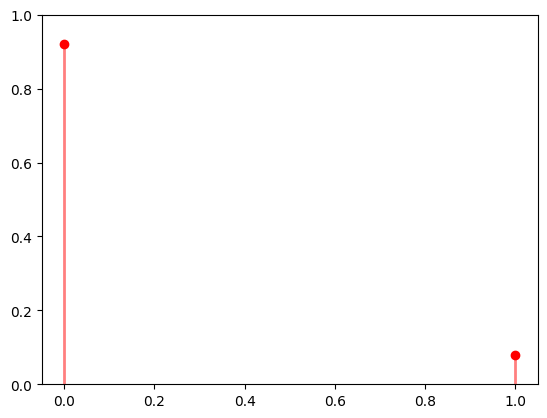

In [126]:
p = 0.1  # Probability of success (1) in each trial
n = 100  # Number of Bernoulli trials to simulate

"""
.rvs: Usage: Generates random samples from a specified distribution.
Applicable Distributions: Bernoulli, Binomial, Poisson, Normal, etc.
Common Parameters:
    p, mu, loc, scale: Parameters defining the distribution.
    size: Number of samples to generate.
    random_state: Seed for reproducibility.
"""
bern_func = stats.bernoulli.rvs(p,size=n) # Random Variates. Result: An array of 0s and 1s representing failures and successes across 100 trials.
print(bern_func)

#Calculating Empirical Probabilities 
"""
A list containing two elements:
    [Empirical probability of failure (0), Empirical probability of success (1)]
Purpose: To store and easily reference both probabilities together.
"""
bern_probability = [
    bern_func[bern_func==0].shape[0] / bern_func.shape[0], # number of failures / total number of trials
    bern_func[bern_func==1].shape[0] / bern_func.shape[0] # number of successes / total number of trials
]
plt.scatter([0,1], bern_probability, color='red')
plt.vlines([0,1],0,bern_probability,color='red',lw=2,alpha=0.5)
plt.ylim([0,1])
plt.show()


# Poisson Distribution

In [127]:
"""Na przykład załóżmy, że średnia liczba połączeń przychodzących w piętnastominutowym przedziale czasowym wynosi 10. 
Obliczmy prawdopodobieństwo, że w ciągu następnych 15 minut nadejdzie 5 połączeń lub więcej, x = 10 oraz k = 5."""
poisson_set = stats.poisson.rvs(mu=10,size=10000)
poisson_set

array([10,  8, 12, ..., 13, 10, 13])

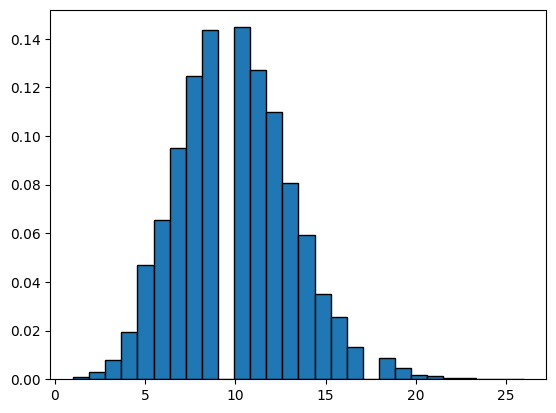

In [128]:
plt.hist(poisson_set, density=True, edgecolor='black',bins=28)
plt.show()

In [129]:
print('Probability that there will be 5 incoming calls within the next 15 minutes:')
print(np.round(1 - stats.poisson.cdf(k=5,mu=10), 2))

Probability that there will be 5 incoming calls within the next 15 minutes:
0.93


---

## **Problem Statement Recap**

**Scenario:**
- **Average Number of Incoming Calls (\( \mu \)):** 10 calls per 15-minute interval.
- **Objective:** Calculate the probability that **5 or more** incoming calls will occur in the next 15 minutes.

**Given:**
- \( \mu = 10 \)
- \( k = 5 \) (the threshold number of calls)

---

## **Code Explanation**

### **1. Importing Necessary Libraries**

Before running the code, ensure you have the required libraries imported:

```python
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
```

- **`numpy (np)`**: For numerical operations.
- **`scipy.stats`**: Contains statistical distributions and functions.
- **`matplotlib.pyplot (plt)`**: For plotting and visualization.

### **2. Generating Poisson Random Variables**

```python
poisson_set = stats.poisson.rvs(mu=10, size=10000)
```

- **`stats.poisson.rvs(mu=10, size=10000)`**:
  - **Purpose:** Generates random variates (samples) from a Poisson distribution.
  - **Parameters:**
    - `mu=10`: The average rate (\( \mu \)) of events (calls) per interval. Here, \( \mu = 10 \) calls per 15 minutes.
    - `size=10000`: The number of random samples to generate. This simulates 10,000 separate 15-minute intervals.
  - **Returns:** An array (`poisson_set`) containing 10,000 integers representing the number of calls in each simulated interval.

**Example Output:**
```python
print(poisson_set)
# Output might look like:
# [12  8 10 11  9 10  7 14  6 10 ...]
```

### **3. Calculating the Probability of 5 or More Calls**

```python
print('Probability that there will be 5 incoming calls within the next 15 minutes:')
print(np.round(1 - stats.poisson.cdf(k=5, mu=10), 2))
```

#### **a. Understanding `stats.poisson.cdf(k=5, mu=10)`**

- **`stats.poisson.cdf(k=5, mu=10)`**:
  - **Purpose:** Calculates the **Cumulative Distribution Function (CDF)** for the Poisson distribution up to \( k = 5 \).
  - **Parameters:**
    - `k=5`: The threshold number of calls.
    - `mu=10`: The average rate (\( \mu \)) of calls.
  - **Returns:** The probability that the number of calls is **less than or equal to 5** in a 15-minute interval, i.e., \( P(X \leq 5) \).

**Mathematical Representation:**
\[
P(X \leq 5) = \sum_{x=0}^{5} \frac{e^{-\mu} \mu^x}{x!}
\]

#### **b. Calculating \( P(X \geq 5) \)**

- **Expression:** `1 - stats.poisson.cdf(k=5, mu=10)`
  - **Explanation:** 
    - \( P(X \geq 5) = 1 - P(X \leq 4) \)
    - **Note:** To calculate \( P(X \geq 5) \), you should subtract \( P(X \leq 4) \) from 1, not \( P(X \leq 5) \).
    - **Correction:** If you intend to calculate \( P(X \geq 5) \), use `k=4`.

**Correct Calculation for \( P(X \geq 5) \):**
```python
print(np.round(1 - stats.poisson.cdf(k=4, mu=10), 2))
```

**However, based on your original code:**
- **Your Calculation:** `1 - stats.poisson.cdf(k=5, mu=10)` computes \( P(X \geq 6) \)
- **Desired Calculation:** \( P(X \geq 5) = 1 - P(X \leq 4) \)

**Final Calculation:**
```python
# Correct probability for 5 or more calls
prob_p5_or_more = 1 - stats.poisson.cdf(k=4, mu=10)
print('Probability that there will be 5 or more incoming calls within the next 15 minutes:')
print(np.round(prob_p5_or_more, 2))
```

#### **c. Rounding the Probability**

- **`np.round(..., 2)`**:
  - **Purpose:** Rounds the resulting probability to **two decimal places** for readability.
  - **Parameters:**
    - The value to be rounded.
    - `2`: Number of decimal places.

**Example Output:**
```python
# Suppose the calculation gives 0.9933
print(np.round(prob_p5_or_more, 2))  # Output: 0.99
```

### **4. Summary of Variables and Their Roles**

- **`poisson_set`**:
  - **Type:** NumPy array.
  - **Contents:** 10,000 simulated values representing the number of incoming calls in each 15-minute interval based on a Poisson distribution with \( \mu = 10 \).
  - **Usage:** Can be used for further analysis or visualization, such as plotting a histogram to visualize the distribution of calls.

- **`1 - stats.poisson.cdf(k=5, mu=10)`**:
  - **Purpose:** Calculates the probability of observing **more than 5** calls (\( X \geq 6 \)) in a 15-minute interval.
  - **Correction Needed:** To find \( P(X \geq 5) \), adjust `k` to 4.

### **5. Additional Details on `stats.poisson.rvs()` Function**

- **Definition:** Generates random variates from a Poisson distribution.
- **Key Parameters:**
  - **`mu` (float):** The expected number of events (rate parameter, \( \mu \)).
  - **`size` (int or tuple of ints):** Number of random variates to generate. Can specify the shape of the output array.
  - **`random_state` (int, RandomState instance, or None):** Seed or random number generator for reproducibility.
- **Returns:** An array of integers representing the number of events (calls) in each interval.

**Example with Additional Parameters:**
```python
# Using random_state for reproducibility
poisson_set = stats.poisson.rvs(mu=10, size=10000, random_state=42)
```

### **6. Practical Example: Visualizing the Poisson Distribution**

To better understand the distribution of incoming calls, you can visualize the simulated data:

```python
import matplotlib.pyplot as plt

# Generate Poisson random variables
poisson_set = stats.poisson.rvs(mu=10, size=10000, random_state=42)

# Plot histogram
plt.hist(poisson_set, bins=range(0, 21), density=True, alpha=0.75, color='skyblue', edgecolor='black')

# Overlay the theoretical Poisson PMF
x = np.arange(0, 21)
pmf = stats.poisson.pmf(x, mu=10)
plt.plot(x, pmf, 'ro', ms=8, label='Poisson PMF')
plt.vlines(x, 0, pmf, colors='r', lw=2, alpha=0.5)

# Labels and Title
plt.xlabel('Number of Incoming Calls')
plt.ylabel('Probability')
plt.title('Poisson Distribution of Incoming Calls (μ=10)')
plt.legend()
plt.show()
```

**Explanation:**
- **Histogram (`plt.hist`)**: Displays the frequency of incoming calls based on the simulated data.
- **Probability Mass Function (PMF) Overlay**: Shows the theoretical probabilities for comparison.
- **Visualization Aids**: Helps in understanding how well the simulation aligns with the theoretical distribution.

---

## **Conclusion**

- **`.rvs` Function:**
  - **Purpose:** Generates random samples from a specified distribution.
  - **Parameters:** `mu`, `size`, `random_state`, among others.
  - **Usage:** Simulate data based on statistical distributions for analysis and visualization.

- **`poisson_set` Variable:**
  - **Type:** Array of simulated Poisson-distributed random variables.
  - **Role:** Represents the number of incoming calls in each simulated 15-minute interval.

- **Probability Calculation:**
  - **Expression:** `1 - stats.poisson.cdf(k-1, mu)`
  - **Purpose:** Computes the probability of observing **k or more** events.
  - **Adjustment Needed:** Ensure correct value of `k` to match the desired probability range.

- **Understanding `.cdf()` and Probability Interpretation:**
  - **`.cdf(k, mu)`:** Probability of observing **up to** `k` events.
  - **`1 - .cdf(k-1, mu)`:** Probability of observing **k or more** events.

- **Rounding with `np.round()`:**
  - **Purpose:** Enhances readability by limiting the number of decimal places.

By correctly setting the parameters and understanding the functions used, you can effectively simulate and calculate probabilities for various scenarios using the Poisson distribution in Python.

# Normal Distribution

In [130]:
# Defines a function gauss that calculates the Probability Density Function (PDF) of a normal distribution.

def gauss(x, sigma=1, mu=0):
    return stats.norm.pdf(x, mu, sigma)

In [131]:
# Generates an array x containing 10,000 equally spaced values between -10 and 10.
x = np.linspace(-10, 10, 10000) 
x

array([-10.       ,  -9.9979998,  -9.9959996, ...,   9.9959996,
         9.9979998,  10.       ])

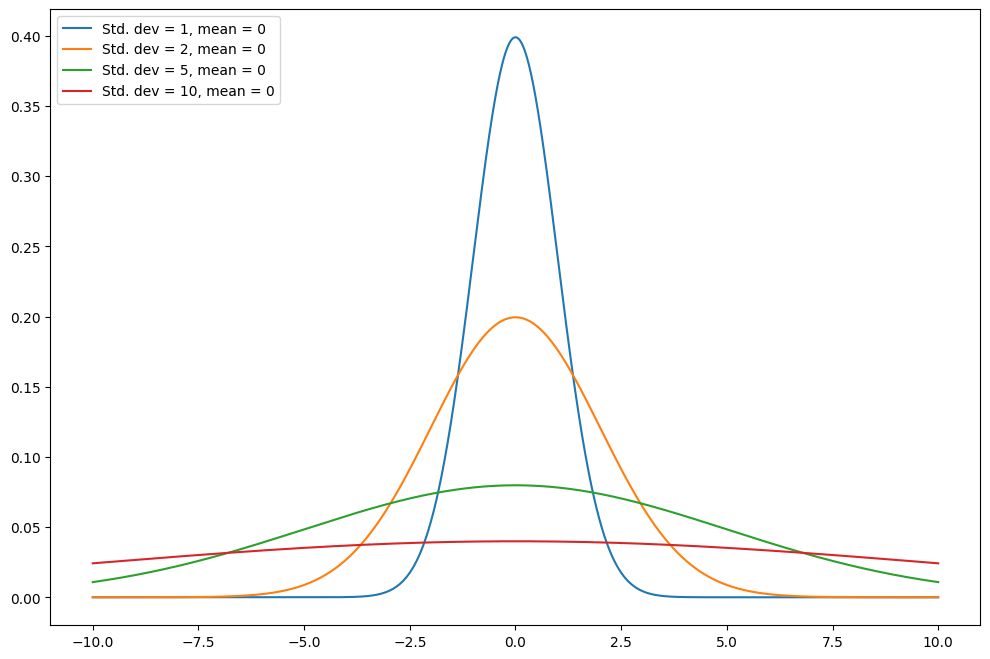

In [132]:
plt.figure(figsize=(12,8))

#Plots four Gaussian (normal distribution) curves with different standard deviations but the same mean.
plt.plot(x, gauss(x, sigma=1), label='Std. dev = 1, mean = 0')
plt.plot(x, gauss(x, sigma=2), label='Std. dev = 2, mean = 0')
plt.plot(x, gauss(x, sigma=5), label='Std. dev = 5, mean = 0')
plt.plot(x, gauss(x, sigma=10), label='Std. dev = 10, mean = 0')
plt.legend(loc='upper left')
plt.show()

---

## **1. Function Definition**

```python
def gauss(x, sigma=1, mu=0):
    return stats.norm.pdf(x, mu, sigma)
```

- **Purpose:** Defines a function `gauss` that calculates the **Probability Density Function (PDF)** of a normal distribution.
- **Parameters:**
  - **`x`**: Input array for which the PDF is calculated.
  - **`sigma` (default=1)**: Standard deviation of the normal distribution.
  - **`mu` (default=0)**: Mean of the normal distribution.
- **Return Value:** The PDF values for the given `x` based on the normal distribution parameters.

### **Key Function Used:**
- **`stats.norm.pdf(x, mu, sigma)`**:
  - Computes the PDF of a normal distribution for input `x`, with a specified mean `mu` and standard deviation `sigma`.

---

## **2. Generating the X-Values**

```python
x = np.linspace(-10, 10, 10000)
```

- **Purpose:** Generates an array `x` containing 10,000 equally spaced values between -10 and 10.
- **Function Used:**
  - **`np.linspace(start, stop, num)`**: Creates a linearly spaced array from `start` to `stop` with `num` elements.

---

## **3. Setting Up the Plot**

```python
plt.figure(figsize=(12,8))
```

- **Purpose:** Initializes a new figure for plotting with a specified size of 12 inches by 8 inches.
- **Function Used:**
  - **`plt.figure(figsize=(width, height))`**: Creates a new figure window with given dimensions.

---

## **4. Plotting the Gaussian Curves**

```python
plt.plot(x, gauss(x, sigma=1), label='Std. dev = 1, mean = 0')
plt.plot(x, gauss(x, sigma=2), label='Std. dev = 2, mean = 0')
plt.plot(x, gauss(x, sigma=5), label='Std. dev = 5, mean = 0')
plt.plot(x, gauss(x, sigma=10), label='Std. dev = 10, mean = 0')
```

- **Purpose:** Plots four Gaussian (normal distribution) curves with different standard deviations but the same mean.
- **Function Used:**
  - **`plt.plot(x, y, label='text')`**: Plots the `y` values against `x` and adds a label for the legend.
- **Explanation of Labels:**
  - `label` specifies the legend entry for each plot, indicating the standard deviation and mean for the curve.

---

## **5. Adding a Legend**

```python
plt.legend(loc='upper left')
```

- **Purpose:** Displays a legend on the plot for identifying each curve.
- **Function Used:**
  - **`plt.legend(loc='position')`**: Positions the legend in the specified location (`'upper left'`).

---

## **6. Displaying the Plot**

```python
plt.show()
```

- **Purpose:** Renders the plot on the screen.
- **Function Used:**
  - **`plt.show()`**: Displays the current figure.

---

## **Explanation of the Output**

- **Visualization Result**:
  - The plot displays four Gaussian curves with a mean of 0 but different standard deviations (1, 2, 5, 10).
  - **Narrower Curve (e.g., σ=1)**: Represents a distribution with data tightly clustered around the mean.
  - **Wider Curve (e.g., σ=10)**: Shows a more spread-out distribution, indicating greater variability.

---

### **Key Concept: Normal Distribution**

- **PDF**: Represents the probability density function, showing the likelihood of different outcomes within a continuous data set.
- **Effect of Standard Deviation (`σ`)**:
  - **Smaller `σ`**: The distribution is taller and narrower.
  - **Larger `σ`**: The distribution is shorter and wider.



# Assignment
#### Stwórz dane z rozkładu normalnego o średniej 3 i odchyleniu standardowym 1 dla 100 oraz 10 000. Na podstawie tych sztucznie stworzonych zbiorów oblicz statystyki poznane w module statystki opisowej. Opisz różnice pomiędzy statystkami.

To help you approach this assignment, here's a suggested step-by-step plan for resolving it:

### **1. Generate Normal Distribution Data**
- **Create two datasets**:
  - One with **100 samples**.
  - Another with **10,000 samples**.
- Both datasets should have:
  - **Mean (μ)**: 3
  - **Standard Deviation (σ)**: 1

### **2. Calculate Descriptive Statistics**
For each dataset, compute the following:
- **Mean**: Average value of the data.
- **Median**: Middle value when the data is sorted.
- **Mode**: Most frequently occurring value (though not always meaningful in continuous data, it's worth calculating for comparison).
- **Minimum and Maximum**: Smallest and largest values in the dataset.
- **Quartiles**: Specifically, the 1st (Q1) and 3rd (Q3) quartiles.
- **Interquartile Range (IQR)**: Difference between Q3 and Q1.
- **Variance**: Measure of data spread (standard deviation squared).
- **Standard Deviation (σ)**: Measure of the dispersion around the mean.
- **Skewness**: Indicates the asymmetry of the data distribution.
- **Kurtosis**: Indicates the "tailedness" of the distribution.

### **3. Visualize the Data**
- **Histograms**: Plot histograms for both datasets to visually compare their distributions.
- **Box Plots**: Create box plots to visualize the spread, median, and outliers.
- **Density Plots**: Overlay density plots for both datasets to compare the distributions.

### **4. Compare and Interpret Differences**
- **Analyze the impact of sample size**:
  - Discuss how the **100-sample dataset** might show more variability and potential deviations from the theoretical mean and standard deviation due to the smaller sample size.
  - Compare it to the **10,000-sample dataset**, which should approximate the true properties of the normal distribution more closely due to the **Law of Large Numbers**.
- **Summarize observations**:
  - Note how the calculated statistics (e.g., mean, variance) for the larger dataset are more stable and closer to the expected theoretical values (mean of 3 and standard deviation of 1).
  - Highlight any differences in skewness or kurtosis, discussing whether they align with the characteristics of a normal distribution.

### **5. Structure Your Report**
- **Introduction**: Briefly explain the objective and approach.
- **Methodology**: Outline how the data was generated and the statistics calculated.
- **Results**:
  - Present tables or summary statistics for each dataset.
  - Include plots (histograms, box plots, density plots) for visual comparison.
- **Discussion**:
  - Analyze and interpret the differences between the 100-sample and 10,000-sample datasets.
- **Conclusion**: Summarize key findings and any insights gained from the comparison.

This approach ensures you comprehensively address the assignment's requirements and deepen your understanding of how sample size influences statistical analysis. Let me know if you'd like to proceed with coding or need further clarification on any step!

Using `np.linspace()` is not the correct approach for generating random data from a normal distribution. `np.linspace()` creates a set of evenly spaced numbers, which won't simulate the randomness or statistical properties of a normal distribution.

### Suggested Approach:
- Use `np.random.normal()` or `stats.norm.rvs()` to generate your datasets. These functions create random samples that follow a normal distribution with the specified mean (μ) and standard deviation (σ).
- This will ensure that the generated datasets reflect the natural variability expected in a normal distribution.

**Clarification**: 
- **`np.linspace()`** is typically used for generating evenly spaced numbers within a range and does **not** create random samples or follow any specific statistical distribution. It is more suitable for plotting or constructing grids.

For this assignment, you need to create datasets where the numbers are randomly drawn from a distribution with a **mean of 3** and a **standard deviation of 1**, rather than being evenly spaced.

Certainly! Here’s an overview of the parameters for both `np.random.normal()` and `stats.norm.rvs()` that will help you create the desired datasets:

### **1. `np.random.normal()`**
- **`loc`**: Specifies the **mean** (μ) of the normal distribution. For your case, set this to **3**.
- **`scale`**: Specifies the **standard deviation** (σ) of the distribution. For your case, set this to **1**.
- **`size`**: Defines the number of samples to generate. Use **100** for the first dataset and **10,000** for the second.

### **2. `stats.norm.rvs()` (from `scipy.stats`)**
- **`loc`**: Specifies the **mean** (μ) of the distribution, just like `np.random.normal()`. Set this to **3**.
- **`scale`**: Specifies the **standard deviation** (σ) of the distribution. Set this to **1**.
- **`size`**: Specifies the number of random samples. Use **100** for the smaller dataset and **10,000** for the larger one.
- **`random_state`** (optional): Allows setting a seed for reproducibility, ensuring you get the same random results every time.

### **Advice for Creating the Data**
- Use these parameters to specify the distribution's properties and the number of samples to match your assignment's requirements.
- Both functions will create random samples that follow a normal distribution with the provided mean and standard deviation.

This information will help you properly use these functions to generate the desired datasets for your assignment.

In [133]:
dataset_2 = stats.norm.rvs(loc=3, scale=1, size=10000)
dataset_2

array([3.43796242, 1.57641726, 4.29203827, ..., 3.19024055, 4.08900955,
       2.72258151])

In [134]:
dataset_1 = np.random.normal(loc=3, scale=1, size=100)
dataset_1

array([3.5312252 , 2.09152778, 3.37342518, 2.95998208, 2.6214649 ,
       2.48019217, 3.23424861, 3.52552504, 3.38847349, 1.28782848,
       3.69024487, 3.50764435, 4.31426535, 3.13176228, 3.54117836,
       2.9382726 , 1.98185574, 2.44732078, 2.66222704, 2.87912875,
       3.4135073 , 4.39274057, 2.54047187, 5.23146264, 3.99074392,
       3.37109018, 3.03123921, 3.04300984, 4.09366619, 2.96210868,
       4.5115202 , 3.74787284, 4.38908067, 0.29061526, 4.27721542,
       3.36992722, 2.69582323, 2.99102188, 4.43703719, 2.98058101,
       2.74896801, 1.81976843, 2.42704502, 3.91825101, 3.54058401,
       3.36630518, 3.51430703, 3.07922582, 2.69064028, 4.42747637,
       2.08683291, 1.9918978 , 3.18196467, 3.71221273, 3.0711476 ,
       4.0696084 , 3.79500117, 3.64406846, 3.73243071, 4.35243939,
       1.85307323, 2.76483506, 0.54876957, 3.1965236 , 3.2301948 ,
       2.28421394, 3.62652894, 1.99890519, 1.76152352, 3.06610418,
       3.73281038, 4.25779218, 4.27890223, 2.70469609, 3.06476

In [143]:
mean_dataset_1 = np.round(np.mean(dataset_1),2)
mean_dataset_1

np.float64(3.12)

In [144]:
mean_dataset_2 = np.round(np.mean(dataset_2),2)
mean_dataset_2

np.float64(3.0)

In [145]:
median_dataset_1 = np.round(np.median(dataset_1),2)
median_dataset_1

np.float64(3.11)

In [146]:
median_dataset_2 = np.round(np.median(dataset_2),2)

In [158]:
mode_dataset_1 = stats.mode(dataset_1)
print(mode_dataset_1)
print(mode_dataset_1[0])

ModeResult(mode=np.float64(0.2906152608372672), count=np.int64(1))
0.2906152608372672


In [159]:
mode_dataset_2 = stats.mode(dataset_2)
print(mode_dataset_2)
print(mode_dataset_2[0])

ModeResult(mode=np.float64(-0.9922585212259372), count=np.int64(1))
-0.9922585212259372


In [161]:
x=dataset_2
loc=3
scale=np.std(dataset_2)
stats.norm.pdf(x, loc, scale) # PDF (Probability Density Function)

array([0.36198385, 0.14506515, 0.17333338, ..., 0.39117591, 0.2205544 ,
       0.38330791])

In [162]:
stats.norm.cdf(x, loc, scale) # CDF (Cumulative Density Function)

array([0.66903588, 0.07761839, 0.90146493, ..., 0.57531886, 0.86153557,
       0.39090203])

In [163]:
q=0.5 # A probability value (between 0 and 1).
stats.norm.ppf(q, loc, scale) # PPF (Probability Point Function)

np.float64(3.0)